In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
ps=pd.read_csv("data/netflix_titles.csv")
ps.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
ps["cast"].replace(np.NaN,"Unknown Cast",inplace=True)

In [7]:
ps["country"].replace(np.NaN,"Unknown Country",inplace=True)

In [8]:
ps["director"].replace(np.NaN,"Unknown Director",inplace=True)

In [9]:
ps.dropna(subset=["date_added","rating","duration"],axis=0,inplace=True)

In [10]:
ps["month_added"]=pd.to_datetime(ps['date_added']).dt.strftime('%b')

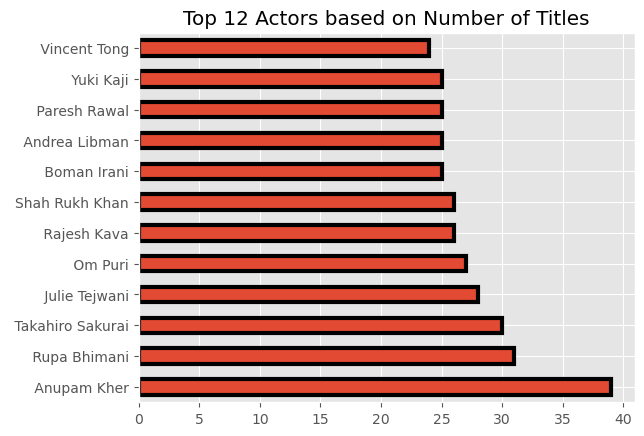

In [11]:
plt.style.use("ggplot")
df=ps[ps["cast"]!="Unknown Cast"]["cast"].str.split(',',expand=True).stack().value_counts().head(12).plot(kind="barh",edgecolor="black",linewidth=3)
plt.title("Top 12 Actors based on Number of Titles")
plt.show()

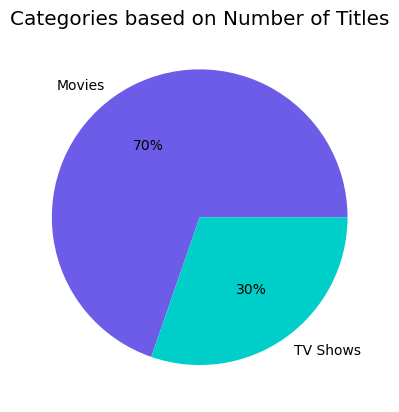

In [12]:
colors = ["#6c5ce7","#00cec9"]
plt.style.use("ggplot")
ps["type"].value_counts().plot(kind="pie",colors=colors,labels=["Movies","TV Shows"],autopct='%.0f%%')
plt.title("Categories based on Number of Titles")
plt.ylabel(None)
plt.show()

<Axes: xlabel='release_year', ylabel='count'>

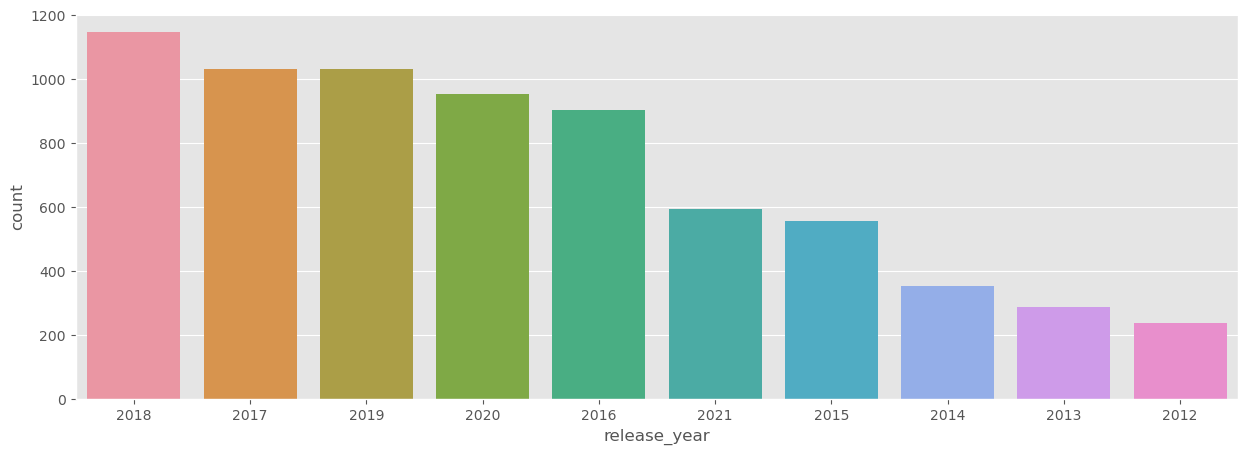

In [13]:
plt.figure(figsize=(15,5))
plt.style.use("ggplot")
sns.countplot(data=ps, x="release_year", order = ps['release_year'].value_counts().iloc[:10].index)

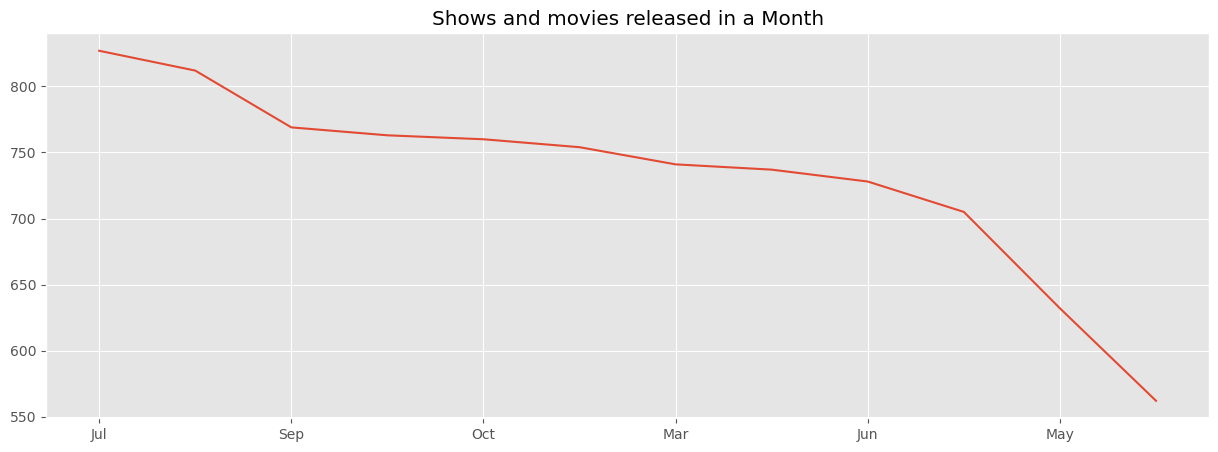

In [14]:
plt.figure(figsize=(15,5))
ps["month_added"].value_counts().plot(kind="line")
plt.title("Shows and movies released in a Month")
plt.show()


<Axes: xlabel='rating'>

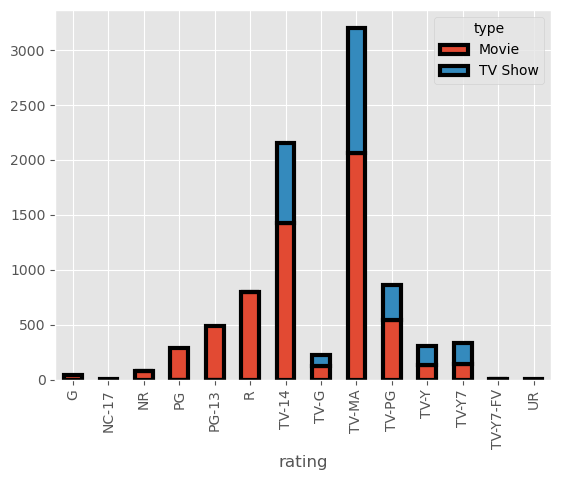

In [15]:
ps[["rating","type"]].value_counts().unstack().plot(kind="bar",edgecolor="black",linewidth=3,stacked=True)

<Axes: >

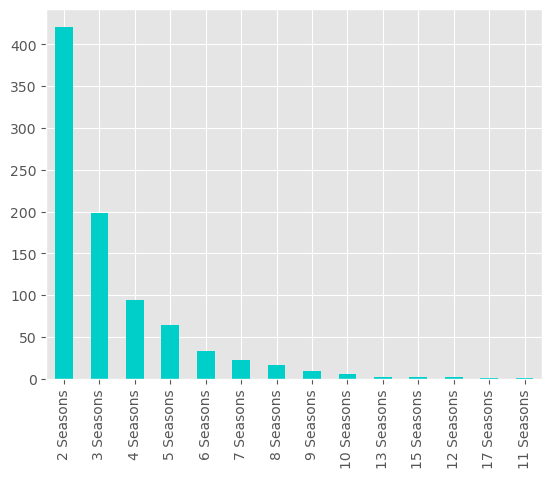

In [16]:
ps[ps['duration'].str.contains("Seasons")]["duration"].value_counts().plot(kind="bar",color="#00cec9")


<Axes: >

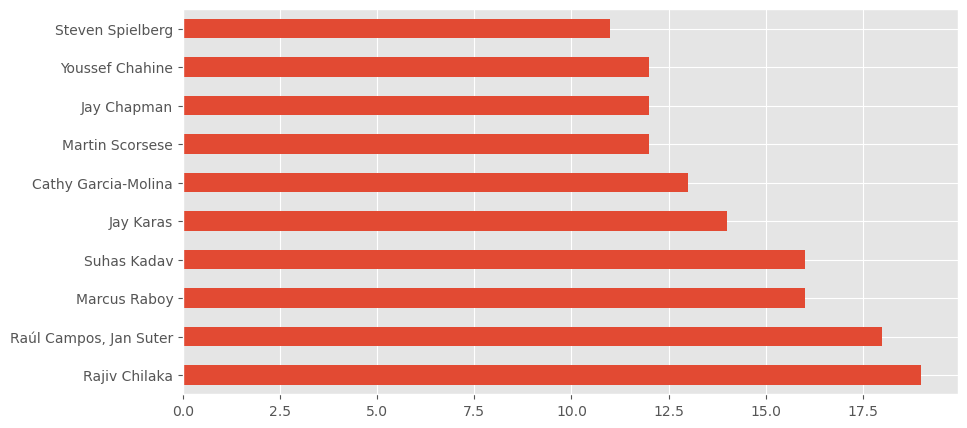

In [17]:
plt.figure(figsize=(10,5))
plt.style.use("ggplot")
ps[ps["director"]!="Unknown Director"]["director"].value_counts().head(10).plot(kind="barh")

<Axes: >

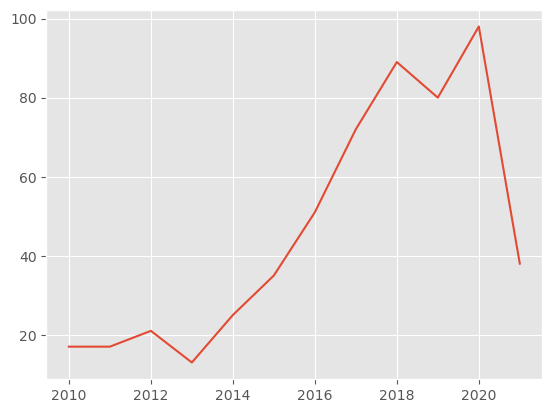

In [18]:
x=ps[ps['listed_in'].str.contains("Comedies")]
x[x['country']=='United States']['release_year'].value_counts().sort_index(ascending=False).head(12).plot(kind="line")

<Axes: >

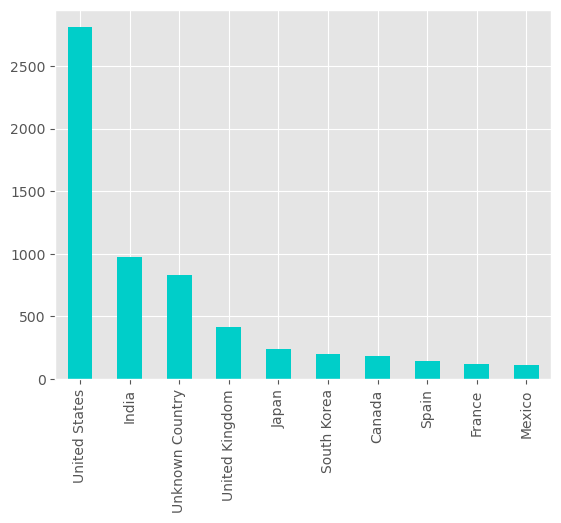

In [24]:
ps["country"].value_counts().head(10).plot(kind="bar",color="#00cec9")

# Conclusion-

1) Actors like Anupam Kher, Rupa Bhimani, Takahiro Sakurai starred in most number of TV Shows and Movies
2) Movies account for 70% and Shows account for the remaining 30% of the Total listings on Netflix
3) Year 2018 saw the most number of releases in terms of TV Shows and Movies
4) Typically more number of TV shows and movies were released in the month of July than any other month
5) More number of Titles are TV-MA rated than any other rating
6) Most number of TV shows that have multiple seasons don't go beyond 2 seasons
7) Rajiv Chilaka, Raul Campos, Jan Suter have directed the most number of Titles
8) In United States most number of shows in the comedy genre were produced in the year 2020 followed by 2018
9) Most number of TV shows and Movies were produced in United States followed by India
